# GLOBAL HAPPINESS SCORE 2023 


 # IMPORT DATA

In [1]:
import pandas as pd
data1=pd.read_csv("/kaggle/input/global-happiness-scores-and-factors/WHR_2023.csv")

# EXAMINE DATA

The World Happiness Score 2023 dataset provides a comprehensive and up-to-date examination of happiness indicators and factors affecting global well-being. The variables in the dataset are:

country: A character-type variable that represents the name of the countries.

region: A categorical variable indicating the region to which a country belongs.

happiness_score: A measure that reflects overall happiness.

gdp_per_capita: A measure indicating the Gross Domestic Product per capita.

social_support: An indicator that measures the level of social support.

healthy_life_expectancy: A measure of the expected years of healthy life.

freedom_to_make_life_choices: An indicator measuring freedom in making life choices.

generosity: A measure reflecting the level of generosity.

perceptions_of_corruption: A measure of the perceived level of corruption in a country.# 

Let's examine the types of variables in the dataset and how many times each occurs

In [2]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       137 non-null    object 
 1   region                        137 non-null    object 
 2   happiness_score               137 non-null    float64
 3   gdp_per_capita                137 non-null    float64
 4   social_support                137 non-null    float64
 5   healthy_life_expectancy       136 non-null    float64
 6   freedom_to_make_life_choices  137 non-null    float64
 7   generosity                    137 non-null    float64
 8   perceptions_of_corruption     137 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.8+ KB


Let's look at the descriptive statistics of the variables.

In [3]:
data1.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
count,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000
mean,5.539796,1.406985,1.156212,0.366176,0.540000,0.148474,0.145898
std,1.139929,0.432963,0.326322,0.156691,0.149501,0.076053,0.126723
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.724000,1.099000,0.962000,0.248500,0.455000,0.097000,0.060000
50%,5.684000,1.449000,1.227000,0.389500,0.557000,0.137000,0.111000
75%,6.334000,1.798000,1.401000,0.487500,0.656000,0.199000,0.187000
max,7.804000,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000


Let's check for missing observations.

In [4]:
data1.isnull().values.any()
data1.isnull().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

There is 1 missing observation in the healthy_life_expectancy variable. Since it is a numeric variable, I preferred to fill the missing observation with the average of the variable.

In [5]:
data1.healthy_life_expectancy=data1.healthy_life_expectancy.fillna(data1.healthy_life_expectancy.mean())
data1.isnull().values.any()

False

Our aim in modeling will be to measure the effect of other variables in determining the happiness_score value. Therefore, happiness_score will be our response variable. country and region are not variables that affect happiness_score, so we drop these variables from the data. We will create models with x representing the independent variables and y representing the dependent variable.# 

In [6]:
data1=data1.drop(["country","region"],axis=1)
y=data1[["happiness_score"]]
x=data1.drop("happiness_score",axis=1)

In [7]:
from sklearn.model_selection import train_test_split

x_egitim,x_test,y_egitim,y_test=train_test_split(x,y,test_size=30,random_state=50)

# LINEAR REGRESSION MODEL

In [8]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
mod=model.fit(x_egitim,y_egitim)
mod.coef_

array([[0.82850578, 1.32640443, 0.43767883, 1.82244477, 0.68032134,
        0.84192323]])

In [9]:
arr = [0.82850578, 1.32640443, 0.43767883, 1.82244477, 0.68032134, 0.84192323]
pd.DataFrame([x.columns,arr])

,0,1,2,3,4,5
0,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
1,0.828506,1.326404,0.437679,1.822445,0.680321,0.841923


In [10]:
pred_test=mod.predict(x_test)

Let's draw a scatter plot showing the relationship between the actual test values (y_test) and the predicted values (pred_test) obtained from the model.

Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='happiness_score'>

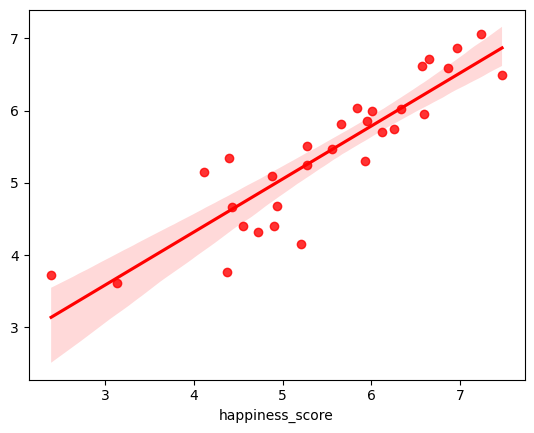

In [11]:
%pip install seaborn
import seaborn as sbn
sbn.regplot(x=y_test,y=pred_test,color="red")


Let's calculate the MSE and R^2 metrics to evaluate the prediction values.

In [12]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,pred_test)
r2=r2_score(y_test,pred_test)
print("MSE " ,mse, "R squared",r2) 

MSE  0.2868724684667978 R squared 0.7876467104650481


# BAGGING (Bootsrap Aggregation)

İmporting


In [13]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

Model Optimization:Before building the model, let's optimize the n_estimators hyperparameter.

In [14]:
model =BaggingRegressor(bootstrap_features=(True)).fit(x_egitim, y_egitim.values.ravel())

params ={"n_estimators": range(2,40)}
bag_cv = GridSearchCV(model, params, cv = 10).fit(x_egitim, y_egitim.values.ravel())
bag_cv.best_params_

{'n_estimators': 32}

In [15]:
model = BaggingRegressor(bootstrap_features=(True), n_estimators = 24).fit(x_egitim, y_egitim.values.ravel())

Predicting

<Axes: xlabel='happiness_score'>

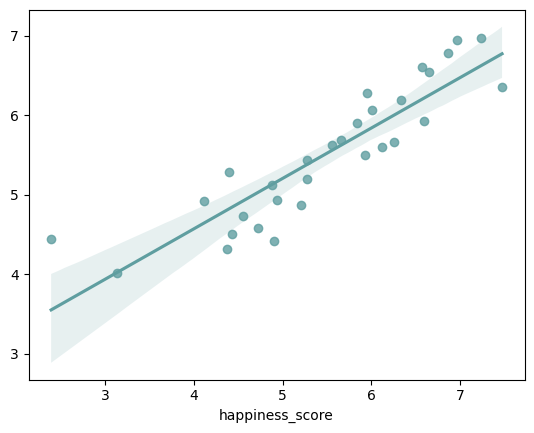

In [16]:
pred_test=model.predict(x_test)
sbn.regplot(x=y_test,y=pred_test,color="cadetblue")

MSE and R squared

In [17]:
mse=mean_squared_error(y_test,pred_test)
r2=r2_score(y_test,pred_test)
print("MSE:",mse,"R kare:",r2)

MSE: 0.32094975648148133 R kare: 0.7624214797309055


# RANDOM FOREST

Importing


In [18]:
from sklearn.ensemble import RandomForestRegressor

Model Optimization

In [19]:
model = RandomForestRegressor().fit(x_egitim, y_egitim.values.ravel())

params = {"max_depth": range(1,5), "max_features": [2,3,5],
          "n_estimators": [100,200]}

rf_cv = GridSearchCV(model, params, cv = 10).fit(x_egitim, y_egitim.values.ravel())
rf_cv.best_params_

{'max_depth': 4, 'max_features': 2, 'n_estimators': 200}

In [20]:
model_best = RandomForestRegressor(max_depth = 4, max_features = 2,
                              n_estimators = 200).fit(x_egitim, y_egitim.values.ravel())

 Predict

<Axes: xlabel='happiness_score'>

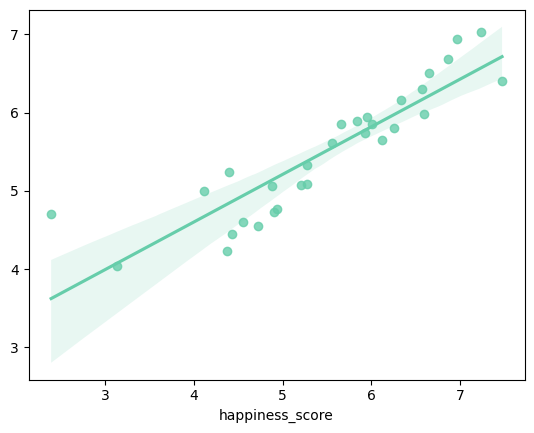

In [21]:
pred_test=model_best.predict(x_test)
sbn.regplot(x=y_test,y=pred_test,color="mediumaquamarine")

MSE and R squared 

In [22]:
mse=mean_squared_error(y_test,pred_test)
r2=r2_score(y_test,pred_test)
print("MSE:",mse,"R kare:",r2)

MSE: 0.337721191644524 R kare: 0.7500066619335451
